### A Practical Guide to Feature Engineering in Python
#### Learn the underlying techniques and tools for doing feature engineering and extraction in Python
#### **By:** <b>Rising Odegua</b>


Feature engineering is one of the most important skill needed in modern data science and machine learning. It has a major influence in the performance of machine learning models and even the quality of insights derived during Exploratory Data Analysis (EDA). In this article, we are going to learn some important techniques and tools that will help you properly extract, prepare and engineer features from your dataset. 

__What you will learn in this article:__
1. What Feature Engineering is?
2. How to handle missing values.
3. How to handle categorical features.
4. How to handle numerical/continuous features.
5. Creating Polynomial features.
6. Normalization of features.
7. Working with Date/Time features8. Working with Latitudes and Longitudes

### What Feature Engineering is?

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work (Wikipedia). It is the act of extracting important features from raw data and transforming them into formats that is suitable for machine learning. 

To do Feature Engineering , a data scientist combines domain knowledge (Knowledge about a specific field) with math and programming skills to transform or come up with new features that will help a machine learning model perform better.

Feature Engineering is a practical area of machine learning and is one of the most important aspect of it. Below we highlight what some industry experts have said about it. 

_…some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used._
       __- Pedro Domingos, "A Few Useful Things to Know about Machine Learning"__
       
       
_Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering._
        __- Andrew Ng, Machine Learning and AI via Brain simulations__
        
Now that we understand what feature engineering is, we will go straight into the practical aspect of this article. First, we get some dataset. 
We will use two dataset for this article. The first one is the Loan Default Prediction dataset hosted on [Zindi by Data science Nigeria](https://medium.com/r/?url=https%3A%2F%2Fzindi.africa%2Fcompetitions%2Fdata-science-nigeria-challenge-1-loan-default-prediction%2Fdata) and the second one - also hosted on Zindi - is the [Sendy Logistics dataset by Sendy](https://medium.com/r/?url=https%3A%2F%2Fzindi.africa%2Fcompetitions%2Fsendy-logistics-challenge). 

You can find the description of the dataset and the corresponding machine learning task on the links provided above. If you clone the repo, you will have access to the dataset and the notebooks used for this tutorial and can follow along easily.

First, let's import some libraries and the datasets.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


loan_demographics = pd.read_csv('traindemographics.csv')
loan_prev = pd.read_csv('trainprevloans.csv')
loan_perf = pd.read_csv('trainperf.csv')

#load logistics dataset
sendy_data = pd.read_csv('sendy_logistics.csv')

We import Pandas, Numpy, Seaborn, Matplotlib for basic data manipulation and visualization, we silence unnecessary warnings using the filterwarnings module and finally we import the datasets. We notice that the loan dataset has three tables/files. These tables are called relations and are related to each other by primary keys.

Let's take a peek at our dataset and get a feel of what records are present.

In [3]:
loan_demographics.sample(3).T

,3021,1582,3428
customerid,8a858f1e5baffcc9015bb02b505f180d,8a858eb85c1be44c015c1c8e37dc38ae,8a858fd85b685607015b6ce657912f6d
birthdate,1983-04-06 00:00:00.000000,1992-06-06 00:00:00.000000,1985-12-18 00:00:00.000000
bank_account_type,Savings,Savings,Savings
longitude_gps,6.96935,4.854494,3.607298
latitude_gps,4.818535,7.110435,6.868025
bank_name_clients,GT Bank,UBA,GT Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,Permanent,NaN,NaN
level_of_education_clients,NaN,NaN,NaN


In [4]:
loan_perf.sample(3).T

,2958,2930,2091
customerid,8a858f415ba54724015ba58d8b2029cc,8a858f3e57e2cfcf0157e66df8327b91,8a858e0256b781d80156bd70d9d21225
systemloanid,301993663,301972012,301962347
loannumber,4,6,11
approveddate,2017-07-24 15:36:37.000000,2017-07-10 19:16:15.000000,2017-07-03 23:24:31.000000
creationdate,2017-07-24 14:36:30.000000,2017-07-10 18:15:09.000000,2017-07-03 22:24:25.000000
loanamount,10000.0,10000.0,30000.0
totaldue,13000.0,11500.0,34500.0
termdays,30,15,30
referredby,8a858fec5b5c994b015b5c9ababf013b,NaN,NaN
good_bad_flag,Bad,Good,Good


In [5]:
loan_prev.sample(3).T

,1668,1236,8566
Unnamed: 0,1668,1236,8566
customerid,8a858ed55bafadc7015bb15979d1553e,8a858e495bf8527e015bf937253b50ff,8a8588235375c27f01537f6d1ad53cff
systemloanid,301886291,301910858,301818227
loannumber,1,2,5
approveddate,2017-05-01 18:20:17.000000,2017-05-17 09:01:16.000000,2017-02-16 02:58:42.000000
creationdate,2017-05-01 17:20:07.000000,2017-05-17 08:01:10.000000,2017-02-16 01:58:35.000000
loanamount,10000.0,10000.0,30000.0
totaldue,11500.0,13000.0,34400.0
termdays,15,30,30
closeddate,2017-05-15 10:20:28.000000,2017-06-05 09:10:58.000000,2017-03-20 19:36:18.000000


In [6]:
sendy_data.sample(3).T

,6803,19497,9356
Order No,Order_No_21281,Order_No_12527,Order_No_14224
User Id,User_Id_2801,User_Id_868,User_Id_2112
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,3
Personal or Business,Business,Business,Business
Placement - Day of Month,14,14,18
Placement - Weekday (Mo = 1),5,2,1
Placement - Time,4:00:19 PM,4:05:45 PM,9:00:13 AM
Confirmation - Day of Month,14,14,18
Confirmation - Weekday (Mo = 1),5,2,1


We now have an overview of our dataset. From this we can see that the loan dataset contains mainly three kind of features (Numerical, Categorical and Date feature) while the Logistic dataset contains four kind of features (Numerical, Categorical and Date and Geo features). With this at the back of our mind, let's do some feature engineering. 

__Note: The techniques and things we do here do not follow a chronological order and may not always apply to your dataset. We just show you what is possible and leave you to chose at your discretion.__


#### How to handle missing values
Missing values are values that are not recorded during data collection. They are mostly not provided, left out due to errors, too difficult to measure. Missing values may can be very important to models and as such there exist numerous ways and techniques to handle them. Let's go over some of these techniques. 

The choice of handling missing values is dependent on the type of features. For categorical features, you can do things like:

1. Mode filling: Fill missing values with the most popular/frequent/modal class.
2. Temporal filling (forward or backward fill): Fill missing values with the preceding value (top-down) or with the succeeding value (bottom-up).
3. Encoding and fill: In this method, you can encode the values using different strategies and the fill with either the mean, mode or the median. 

In the loan demographic data set, we have three categorical features (bank_branch_clients, employment_status_clients, level_of_education_clients) with missing values. Let's show the process of mode filling below using the employment_status_clients feature.

In [7]:
#Fill categorical
print("shape of loan_demographic is {}".format(loan_demographics.shape))
loan_demographics.isna().sum()

shape of loan_demographic is (4346, 9)


customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [8]:
loan_demographics['employment_status_clients'].value_counts()

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

From the value_counts, which show the classes present and their corresponding frequecies. We can see that the Permanent class is more popular. We can use the value to fill all missing values in the employment_status_clients feature as shown below.

In [9]:
#fill with mode (Permanent)
loan_demographics['employment_status_clients'] = loan_demographics['employment_status_clients'].fillna(value='Permanent')
loan_demographics.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients        0
level_of_education_clients    3759
dtype: int64

For numerical features, we can do things like:

1. Filling with mean, mode or median.
2. Temporal filling (Backward or forward filling).
3. Use of machine learning models: Trains a machine learning model to learn the most appropriate fill values.

To demonstrate the process of filling numerical values, we will use the Sendy logistics data, as it has two numerical features (Temperature and Precipitation in millimeters) that contain missing values.

In [10]:
sendy_data.shape

(21201, 29)

In [11]:
sendy_data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

<AxesSubplot:>

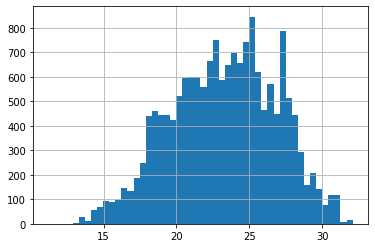

In [15]:
sendy_data['Temperature'].hist(bins=50)

<AxesSubplot:>

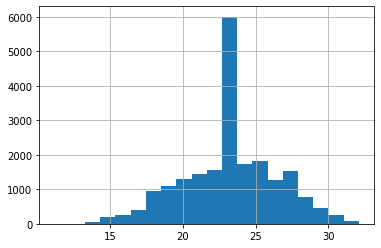

In [16]:
mean_df = round(sendy_data['Temperature'].mean())
sendy_data['Temperature_mean'] = sendy_data['Temperature'].fillna(mean_df)
sendy_data['Temperature_mean'].hist(bins=20)

<AxesSubplot:>

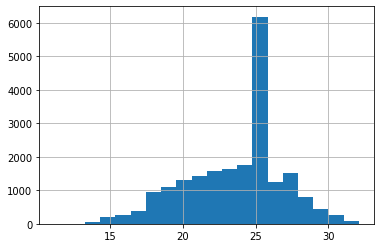

In [17]:
mode_df = round(sendy_data['Temperature'].mode()[0])
sendy_data['Temperature_mode'] = sendy_data['Temperature'].fillna(mode_df)
sendy_data['Temperature_mode'].hist(bins=20)

<AxesSubplot:>

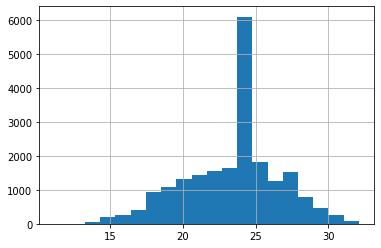

In [18]:
median_df = round(sendy_data['Temperature'].median())
sendy_data['Temperature_median'] = sendy_data['Temperature'].fillna(median_df)
sendy_data['Temperature_median'].hist(bins=20)

In [20]:
sendy_data['Temperature'].mode()[0]

24.7

In [21]:

mode_df = round(sendy_data['Temperature'].mode()[0])
median_df = round(sendy_data['Temperature'].median())

#Fill with mean
print("Filling with mean value of {}".format(mean_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(mean_df)

#Fill with mode
print("Filling with modal value of {}".format(mode_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(mode_df)

#Fill with median
print("Filling with median value of {}".format(median_df))
sendy_data['Temperature'] = sendy_data['Temperature'].fillna(median_df)

Filling with mean value of 23
Filling with modal value of 25
Filling with median value of 24


In [22]:
sendy_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Temperature_mean,Temperature_mode,Temperature_median
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,...,23.205575,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947,23.205575,23.617443,23.411509
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,...,3.223706,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788,3.223706,3.298040,3.235914
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,11.200000,11.200000,11.200000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,21.400000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000,21.400000,21.400000,21.400000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,23.000000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000,23.000000,24.700000,24.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,25.300000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000,25.300000,25.300000,25.300000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,32.100000,32.100000,32.100000


First, we calculate the value of the chosen fill method, and then we use the Pandas fiilna function to automatically find and replace missing values with the calculated value. 

__Note: You should only use one of mean, mode and median at at time. Also, the mode always return the modal value and its index, this means we can have mire than one returned modal value. We chose the first one by indexing with [0].__

__Next, let's demonstrate how to train a machine learning model that can calculate the best fill value.__

This time, we will fill the second numerical feature (Precipitation in millimeters), but first we need to select some fearures that correlate with the Precipitation in millimeters feature. That is, which feature(s) can help predict Precipitation in millimeters. The Seaborn correlation heatmap plot can help us decide. We demonstrate this below.

<AxesSubplot:>

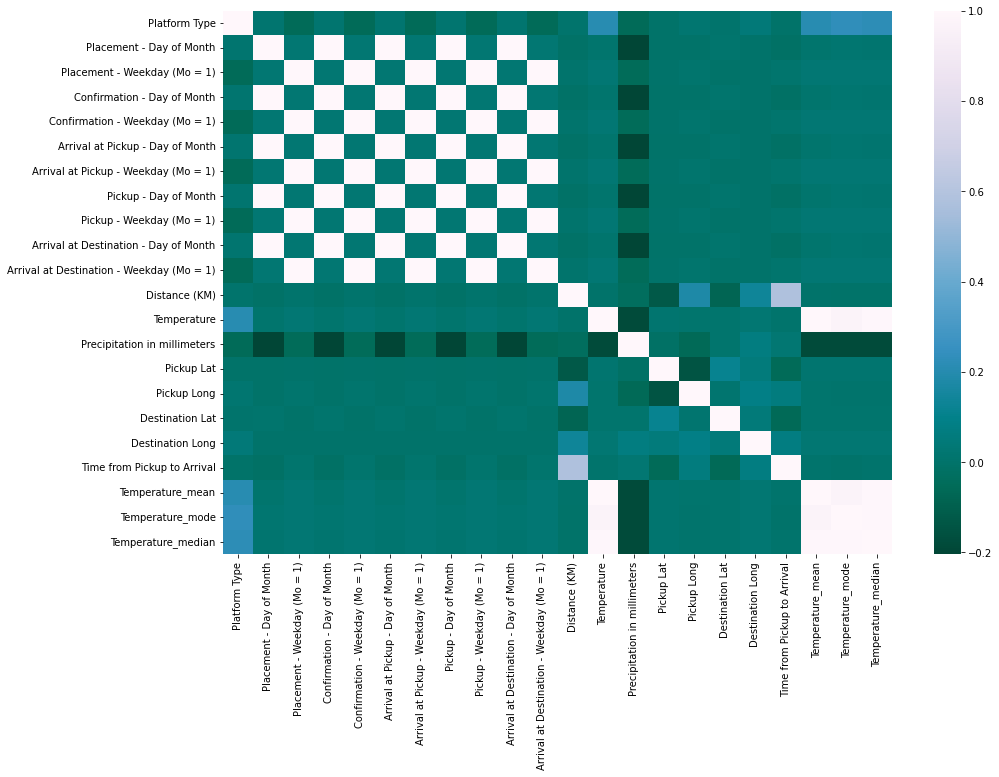

In [26]:
#get correlated values
plt.figure(figsize = (15,10))
sns.heatmap(sendy_data.corr(),cmap="PuBuGn_r")

From the heatmap above, we can see that majority of the features do not really correlate with Precipitation in millimeters feature. We can make use of the last three features (Destination Lat, Destination Long and Time from Pickup to Arrival) as these show little correlation. Let's demonstrate this below.

<AxesSubplot:>

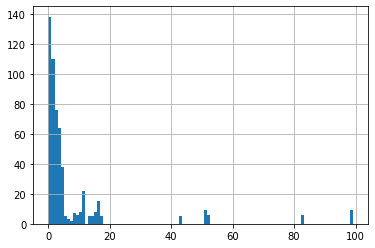

In [29]:
sendy_data['Precipitation in millimeters'].hist(bins=100)

[8.03056 8.18609 7.86142 ... 8.46164 7.45028 8.60717]


<AxesSubplot:>

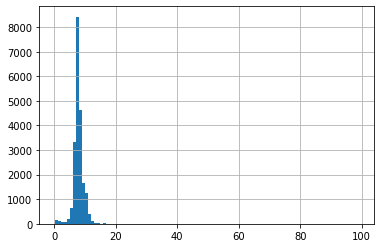

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

to_train = ['Precipitation in millimeters', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']

temp_df = sendy_data[to_train]
#Step-1: Split the dataset that contains the missing values and no missing values as test and train respectively.
x_train = temp_df[temp_df['Precipitation in millimeters'].notnull()].drop(columns='Precipitation in millimeters')
y_train = temp_df[temp_df['Precipitation in millimeters'].notnull()]['Precipitation in millimeters']
x_test = temp_df[temp_df['Precipitation in millimeters'].isnull()].drop(columns='Precipitation in millimeters')


lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print(np.round(pred, 5))
sendy_data['Precipitation in millimeters_original']=sendy_data['Precipitation in millimeters']
sendy_data['Precipitation in millimeters'][sendy_data['Precipitation in millimeters'].isnull()] = pred
sendy_data['Precipitation in millimeters'].hist(bins=100)

In [31]:
sendy_data.describe()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,Temperature_mean,Temperature_mode,Temperature_median,Precipitation in millimeters_original
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,...,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,552.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,...,7.949274,-1.281470,36.811264,-1.282581,36.811220,1556.920947,23.205575,23.617443,23.411509,7.905797
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,...,3.036434,0.030507,0.037473,0.034824,0.044721,987.270788,3.223706,3.298040,3.235914,17.089971
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000,11.200000,11.200000,11.200000,0.100000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,...,7.132147,-1.300921,36.784605,-1.301201,36.785661,882.000000,21.400000,21.400000,21.400000,1.075000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,...,7.763129,-1.279395,36.807040,-1.284382,36.808002,1369.000000,23.000000,24.700000,24.000000,2.900000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,...,8.448422,-1.257147,36.829741,-1.261177,36.829477,2040.000000,25.300000,25.300000,25.300000,4.900000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,...,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000,32.100000,32.100000,32.100000,99.100000


First, we import and use a simple Linear Regression model, then we saved the most correlated values to Precipitation in millimeters as observed from the heatmap plot to a list called to_train, then we created a train and test dataset from this features where train dataset contains no missing values and the test dataset contains the missing values we want to predict. Finally, we fit the model, make predictions on the test set and use the predictions to fill the missing values. 

Alternatively, you can use the __IterativeImputer__ function in the sklearn.experimental module to automatically fill missing values using machine learning models. We demonstrate this below.

In [32]:
sendy_data = pd.read_csv('sendy_logistics.csv')

In [33]:
#get the index of missing so we can some of the values used for filling
sendy_data['Temperature_original']=sendy_data['Temperature']
missing_indx = list(sendy_data['Temperature'][sendy_data['Temperature'].isna()].index)

In [34]:
len(missing_indx)

4366

First, let's save the index of the missing values in a variable so that after filling, we can take a look at the values calculated by the IterativeImputer function.

In [35]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

# Run imputer with a Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1)

to_train = ['Temperature', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']
sendy_data[to_train] = pd.DataFrame(imp.fit_transform(sendy_data[to_train]), columns=to_train)

In [36]:
sendy_data['Temperature'].describe()

count    21201.000000
mean        23.296385
std          3.377355
min         11.200000
25%         21.000000
50%         23.500000
75%         25.700000
max         32.100000
Name: Temperature, dtype: float64

<AxesSubplot:>

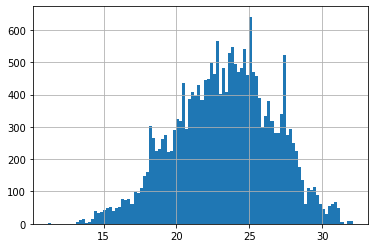

In [37]:
sendy_data['Temperature'].hist(bins=100)

<AxesSubplot:>

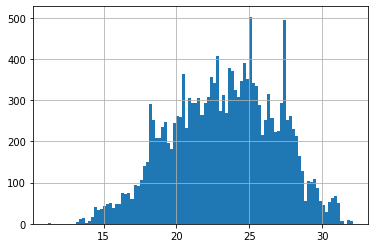

In [38]:
sendy_data['Temperature_original'].hist(bins=100)

#### How to handle categorical features
Categorical features are features which can take on values from a limited set of values. For example the relative hotness of a place/thing (hot, hotter, hottest) or star ratings for an app (1,2,3,4,5). In regards to our dataset, features like level_of_education_clients in the loan_demographics dataset is a categorical feature containing classes like (Secondary, Graduate, Post-Graduate, Primary). 

Machine learning models cannot work with categorical features the way they are. These features must be converted to numerical forms before they can be used. The process of converting the categorical features to numerical features is called encoding. 

There are numerous type of encoding available, and the choice of which to use depends on the categorical type. So first, let's understand the different categorical types there is. 

__Types of categorical features__

1. Ordinal Categorical Features : Features have a natural ordered category. That is, one class is higher than another. For example star ratings (1,2,3,4,5). Where class 5 is a higher rating than 4/3/2/1.
2. Non-Ordinal Categorical Features: Features have no order. That is, no class is higher than the other.

__What encoding scheme to use and when to use it__

1. Manual Encoding of Ordinal Feature: If the classes in a categorical features are ordinal, and the unique values are small, then you can manually assign labels that have some form of ordering. Let's demonstrate this below using the level_of_education_clients feature. This feature has some form of ordinality as the class Post-Graduate is higher than Graduate/Secondary/Primary class.

In [39]:
loan_demographics.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients        0
level_of_education_clients    3759
dtype: int64

In [40]:
loan_demographics['level_of_education_clients'].value_counts()

Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: level_of_education_clients, dtype: int64

In [41]:
#The feature level_of_education is ordinal
loan_demographics['level_of_education_clients'].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [42]:
#use a simple map function
map_education = {"Primary" : 1, "Secondary": 2, "Graduate": 3, "Post-Graduate": 4}
    
loan_demographics['level_of_education_clients'] = loan_demographics['level_of_education_clients'].map(map_education)

loan_demographics['level_of_education_clients'].value_counts()

3.0    420
2.0     89
4.0     68
1.0     10
Name: level_of_education_clients, dtype: int64

----------------------------------------------------------------------------------------------------------------------

To do perform automated encoding, we will use an efficient library called __categorical_encoders__. This library offers numerous encoding schemes out of the box and has first hand support for Pandas DataFrame.

To install the library, you can use pip as follow:

```
pip install category_encoders

```

__Label Encoding:__ If you have a large number of classes in a categorical feature, you can use label encoding. Label encoding assigns a unique label (Integer number) to a specific class. We demonstrate this using two features (bank_name_clients, bank_branch_clients) with large number of unique classes, 18 and 45 respectively.

In [43]:
!pip install category_encoders


You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.


In [ ]:
#Check the number of unique classes
cat_cols = loan_demographics.select_dtypes(include='object').columns

for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(loan_demographics[col].nunique())
    print('--------------------------')

The OrdinalEncoder function in the categorical_encoders library can be used to label encode as shown below:

In [ ]:
!pip install category_encoders

In [44]:
import category_encoders as ce

#Label encoding
loan_demographics['bank_name_clients_or'] = loan_demographics['bank_name_clients']
loan_demographics['bank_branch_clients_or'] = loan_demographics['bank_branch_clients']
cat_cols = ['bank_name_clients', 'bank_branch_clients'] 

encoder = ce.OrdinalEncoder(cols=cat_cols)
loan_demographics = encoder.fit_transform(loan_demographics)

In [ ]:
ce.

In [ ]:
loan_demographics.shape

In [45]:
loan_demographics[['bank_name_clients_or', 'bank_branch_clients_or']].describe()

,bank_name_clients_or,bank_branch_clients_or
count,4346,51
unique,18,45
top,GT Bank,OGBA
freq,1598,3


In [47]:
loan_demographics[cat_cols].value_counts()

bank_name_clients  bank_branch_clients
1                  1                      1580
11                 1                       584
4                  1                       428
8                  1                       348
9                  1                       299
                                          ... 
1                  10                        1
8                  14                        1
                   26                        1
                   35                        1
7                  8                         1
Length: 69, dtype: int64

In [46]:
loan_demographics[cat_cols].describe()

,bank_name_clients,bank_branch_clients
count,4346.000000,4346.000000
mean,5.615739,1.254027
std,4.395109,2.746922
min,1.000000,1.000000
25%,1.000000,1.000000
50%,4.000000,1.000000
75%,10.000000,1.000000
max,18.000000,46.000000


First, we save the categorical columns we want to encode into a list, next we create the encoder objects and then we fit transform on the dataset.

__One-Hot Encoding:__ The One-Hot encoding uses binary values to represent classes. The one hot encoder creates a feature per category, and quickly becomes inefficient by creating a large number of feature as the number of classes in the categorical feature increases.

In [48]:
cats = ['bank_account_type','level_of_education_clients']

one_hot_enc = ce.OneHotEncoder(cols=cats)
loan_demographics = one_hot_enc.fit_transform(loan_demographics)

In [52]:
loan_demographics.head().T

,0,1,2,3,4
customerid,8a858e135cb22031015cbafc76964ebd,8a858e275c7ea5ec015c82482d7c3996,8a858e5b5bd99460015bdc95cd485634,8a858efd5ca70688015cabd1f1e94b55,8a858e785acd3412015acd48f4920d04
birthdate,1973-10-10 00:00:00.000000,1986-01-21 00:00:00.000000,1987-04-01 00:00:00.000000,1991-07-19 00:00:00.000000,1982-11-22 00:00:00.000000
bank_account_type_1,1,1,1,1,1
bank_account_type_2,0,0,0,0,0
bank_account_type_3,0,0,0,0,0
longitude_gps,3.319219,3.325598,5.7461,3.36285,8.455332
latitude_gps,6.528604,7.119403,5.563174,6.642485,11.97141
bank_name_clients,1,2,3,1,1
bank_branch_clients,1,1,1,1,1
employment_status_clients,Permanent,Permanent,Permanent,Permanent,Permanent


__Hash Encoding:__ Hash encoding or feature hashing is a fast and space-efficient way of encoding features. It is very efficient for categorical features with large number of classes. Hash encoder works by applying a hash function to the features.

In [53]:
cat_cols = ['bank_name_clients', 'bank_branch_clients'] 

hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)
loan_demographics = hash_enc.fit_transform(loan_demographics)

loan_demographics.head().T

,0,1,2,3,4
col_0,0,0,0,0,0
col_1,2,1,1,2,2
col_2,0,1,0,0,0
col_3,0,0,1,0,0
col_4,0,0,0,0,0
col_5,0,0,0,0,0
col_6,0,0,0,0,0
col_7,0,0,0,0,0
col_8,0,0,0,0,0
col_9,0,0,0,0,0


To use the hash function in categorical encoders, first you specify the features you want to hash encode, create a hash encoder object and specify the length of the hash vector to use, and finally you can fit transform.

__Target Encoding:__ In target encoding, we replace a categorical value with the mean of the target variable. That is, we calculate the average of the target value by a specific category. Target encoding helps to encode useful properties of the feature and can sometimes help improve classification models while sometimes it can lead to severe overfitting. 

To demonstrate target encoding, we will use the loan performance dataset (loan_perf). The target of interest in this dataset is the feature (good_bad_flag) and the task is to predict if a customer will repair a loan or not. The feature good_bad_flag is represented as categoricals, so we first convert it to numbers as shown below.

In [54]:
map_target = {"Good": 0, "Bad": 1}
loan_perf['good_bad_flag'] = loan_perf['good_bad_flag'].map(map_target)

Next, we will target encode the feature loannumber. This feature is numeric in nature, but can be treated like a categorical feature because it has a limited number of classes.

In [56]:
loan_perf['loannumber_or'] = loan_perf['loannumber']
target_enc = ce.TargetEncoder(cols=['loannumber'])
loan_perf = target_enc.fit_transform(X=loan_perf, y=loan_perf['good_bad_flag'])
loan_perf.tail().T

,4363,4364,4365,4366,4367
customerid,8a858e6d58b0cc520158beeb14b22a5a,8a858ee85cf400f5015cf44ab1c42d5c,8a858f365b2547f3015b284597147c94,8a858f935ca09667015ca0ee3bc63f51,8a858fd458639fcc015868eb14b542ad
systemloanid,302003163,301998967,301995576,301977679,301967124
loannumber,0.249103,0.249103,0.267164,0.249103,0.168182
approveddate,2017-07-30 09:19:42.000000,2017-07-27 15:35:47.000000,2017-07-25 16:25:57.000000,2017-07-14 13:50:27.000000,2017-07-06 21:01:06.000000
creationdate,2017-07-30 08:18:30.000000,2017-07-27 14:35:40.000000,2017-07-25 15:24:47.000000,2017-07-14 12:50:21.000000,2017-07-06 20:01:01.000000
loanamount,10000.0,10000.0,10000.0,10000.0,30000.0
totaldue,13000.0,13000.0,11500.0,13000.0,34500.0
termdays,30,30,15,30,30
referredby,NaN,NaN,NaN,8a858eda5c8863ff015c9dead65807bb,NaN
good_bad_flag,1,1,1,1,1


<AxesSubplot:xlabel='loannumber'>

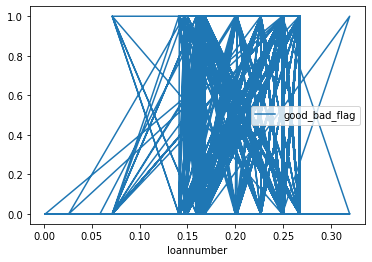

In [57]:
loan_perf.plot(kind="line", x="loannumber",y="good_bad_flag")

In [58]:
loan_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   float64
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   int64  
 10  loannumber_or  4368 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 375.5+ KB


First, we created a target encoder object and pass the column we want to encode, next we fit transform by passing both the dataset and the target of interest, and finally we print the result. 

There are many more encoding schemes (Binary encoders, Count Encoders, Leave One Out Encoders, CatBoost Encoders etc.)that you can try for categorical features. A good place to learn about this is the [official documentation](https://medium.com/r/?url=https%3A%2F%2Fcontrib.scikit-learn.org%2Fcategorical-encoding%2F) site of the categorical encoder library. 

### How to handle numerical/continuous features

Numerical/Continuous features are the most common type of features found in datasets. They can take values from a given range. For example, the price of a product, the temperature of a place, coordinates of a place on a map. Feature Engineering on numerical feature mostly depends on domain knowledge

Some of the things we can do here are:

1. Log transformation: Log transformation helps to center or in statistical term normally distribute data. It can help most machine learning models perform better. 

__Note: If you log transform the target feature, always take the exponent at the end of the analysis when interpreting the result.__ 

Log transformation are mostly performed on skewed features. Features can either be left or right skewed. Skewness can be easily checked by visualization. to demonstrate log transformation, we will use the Distance (KM) feature in the sendy dataset as the feature is right skewed.

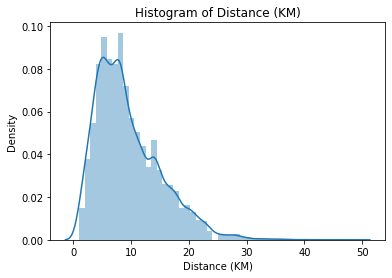

In [59]:
sns.distplot(sendy_data['Distance (KM)'])
plt.title("Histogram of Distance (KM)")
plt.show()

In [64]:
sendy_data = pd.read_csv('sendy_logistics.csv')

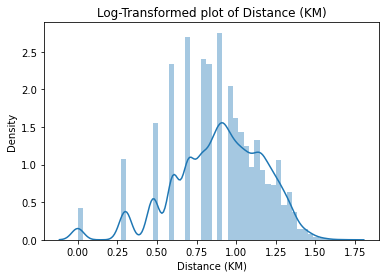

In [70]:
sns.distplot(np.log10(sendy_data['Distance (KM)']))
plt.title("Log-Transformed plot of Distance (KM)")
plt.savefig("hist_trans.png")
plt.show()

First, we log transform by using taking the log of all the values. We use the efficient numpy implementation which adds a 1 to the value before taking the logarithm, this helps to avoid taking log of zero. 

__Using Domain Knowledge:__ If you have domain expertise or have someone with domain expertise on your team, you can come up with new features that can greatly help your machine learning models. We demonstrate this by creating two features from the loan previous dataset as shown below.

1. __Interest elapsed:__ Interest elapsed is a feature we create from the difference between the total due and the loan amount initially collected.

In [71]:
loan_prev.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18183.0,9.091000e+03,5249.124308,0.0,4545.5,9091.0,13636.5,18182.0
systemloanid,18183.0,3.018395e+08,93677.672704,301600134.0,301776577.0,301854965.0,301919682.5,302000275.0
loannumber,18183.0,4.189353e+00,3.249490,1.0,2.0,3.0,6.0,26.0
loanamount,18178.0,1.648927e+04,9293.862602,3000.0,10000.0,10000.0,20000.0,50000.0
totaldue,18183.0,1.957320e+04,10454.245277,3450.0,11500.0,13000.0,24500.0,68100.0
termdays,18183.0,2.669279e+01,10.946556,15.0,15.0,30.0,30.0,90.0


In [72]:
loan_prev.describe(include="O").T

,count,unique,top,freq
customerid,18183,4359,8a858f7d5578012a01557ea194d94948,26
approveddate,18183,18172,2016-11-16 09:26:35.000000,2
creationdate,18183,18173,2016-10-02 12:59:34.000000,2
closeddate,18183,17955,2016-11-07 00:53:42.000000,5
referredby,1026,521,8a858fc55b2548dd015b286e452c678c,14
firstduedate,18183,363,2017-07-03 00:00:00.000000,398
firstrepaiddate,18183,18011,2016-08-03 00:00:00.000000,7


In [73]:
#Create feature interest
loan_prev['interest_elapsed'] = loan_prev['totaldue'] - loan_prev['loanamount']

2. __Loan count:__ We can calculate the total number of loans collected by a customer by aggregating loan numbers.

In [74]:
#Groupby customer id and calculate their total loans taken
loannumber_count = loan_prev.groupby(by='customerid').agg(['count'])[['loannumber']].reset_index()
loannumber_count

,customerid,loannumber
,,count
0,8a1088a0484472eb01484669e3ce4e0b,1
1,8a1a1e7e4f707f8b014f797718316cad,4
2,8a1a32fc49b632520149c3b8fdf85139,7
3,8a1eb5ba49a682300149c3c068b806c7,8
4,8a1edbf14734127f0147356fdb1b1eb2,2
...,...,...
4354,8a858fff5a28d297015a33bc2e845305,6
4355,8a858fff5a36fe68015a37f8550a02a2,6
4356,8a858fff5a36fe68015a3ac5851618ab,1


In [78]:
#merge back to dataset on customer_id
loan_prev = loan_prev.merge(right=loannumber_count, how='left', on='customerid')

loan_prev.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18183.0,9.091000e+03,5249.124308,0.0,4545.5,9091.0,13636.5,18182.0
systemloanid,18183.0,3.018395e+08,93677.672704,301600134.0,301776577.0,301854965.0,301919682.5,302000275.0
loannumber,18183.0,4.189353e+00,3.249490,1.0,2.0,3.0,6.0,26.0
loanamount,18178.0,1.648927e+04,9293.862602,3000.0,10000.0,10000.0,20000.0,50000.0
totaldue,18183.0,1.957320e+04,10454.245277,3450.0,11500.0,13000.0,24500.0,68100.0
termdays,18183.0,2.669279e+01,10.946556,15.0,15.0,30.0,30.0,90.0
interest_elapsed,18178.0,3.071474e+03,1493.233873,0.0,1500.0,3000.0,3800.0,9000.0
"('loannumber', 'count')_x",18183.0,7.372876e+00,4.282959,1.0,4.0,7.0,10.0,26.0
"('loannumber', 'count')_x",18183.0,7.372876e+00,4.282959,1.0,4.0,7.0,10.0,26.0
"(loannumber, count)",18183.0,7.372876e+00,4.282959,1.0,4.0,7.0,10.0,26.0


In [79]:
loan_prev.columns

Index([               'Unnamed: 0',                'customerid',
                    'systemloanid',                'loannumber',
                    'approveddate',              'creationdate',
                      'loanamount',                  'totaldue',
                        'termdays',                'closeddate',
                      'referredby',              'firstduedate',
                 'firstrepaiddate',          'interest_elapsed',
       '('loannumber', 'count')_x', '('loannumber', 'count')_x',
           ('loannumber', 'count')],
      dtype='object')

In [80]:
loan_prev["('loannumber', 'count')"].value_counts()

KeyError: "('loannumber', 'count')"

3. __Speed:__ Using knowledge of physics, we know that speed is Distance per unit of Time, therefore, we can create a new feature (speed) in the Sendy dataset from the features Distance (KM) and Time from Pickup to Arrival.

In [81]:
 sendy_data['Time from Pickup to Arrival'].describe()

count    21201.000000
mean      1556.920947
std        987.270788
min          1.000000
25%        882.000000
50%       1369.000000
75%       2040.000000
max       7883.000000
Name: Time from Pickup to Arrival, dtype: float64

In [82]:
#create feature speed in sendy dataset
sendy_data['speed'] = sendy_data['Distance (KM)'] / sendy_data['Time from Pickup to Arrival']
sendy_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


In [83]:
 sendy_data['speed'].describe()

count    21201.000000
mean         0.069251
std          0.529249
min          0.000256
25%          0.004573
50%          0.006407
75%          0.008413
max         17.000000
Name: speed, dtype: float64

<AxesSubplot:>

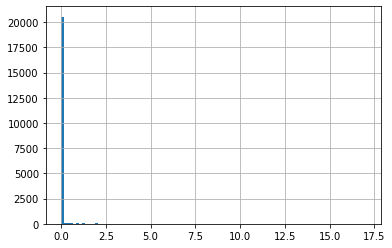

In [84]:
sendy_data['speed'].hist(bins=100)

#### Polynomial (Cross) Features: 
Polynomial features is the creation of interaction among features. It helps to capture relationships among independent features/variables and can help decrease bias of a machine learning model when it is not contributing to massive overfitting. We can create polynomial/cross features manually by simply adding, multiplying or dividing features with each other. In this article, we are going to use the Polynomial feature module present in sklearn library. 

We will create interaction among the features loannumber, totaldue and termdays in the loan previous dataset as shown below.

In [85]:
#Use Sklearn Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
to_cross = ['loannumber', 'totaldue', 'termdays']
crossed_feats = poly.fit_transform(loan_prev[to_cross].values)

#Convert to Pandas DataFrame and merge to original dataset
crossed_feats = pd.DataFrame(crossed_feats)
loan_prev = pd.concat([loan_prev, crossed_feats], axis=1)

In [86]:
crossed_feats

,0,1,2,3,4,5,6,7,8,9
0,1.0,2.0,13000.0,30.0,4.0,26000.0,60.0,1.690000e+08,390000.0,900.0
1,1.0,9.0,13000.0,30.0,81.0,117000.0,270.0,1.690000e+08,390000.0,900.0
2,1.0,8.0,23800.0,30.0,64.0,190400.0,240.0,5.664400e+08,714000.0,900.0
3,1.0,5.0,11500.0,15.0,25.0,57500.0,75.0,1.322500e+08,172500.0,225.0
4,1.0,2.0,11500.0,15.0,4.0,23000.0,30.0,1.322500e+08,172500.0,225.0
...,...,...,...,...,...,...,...,...,...,...
18178,1.0,2.0,13000.0,30.0,4.0,26000.0,60.0,1.690000e+08,390000.0,900.0
18179,1.0,9.0,34400.0,30.0,81.0,309600.0,270.0,1.183360e+09,1032000.0,900.0
18180,1.0,4.0,13000.0,30.0,16.0,52000.0,120.0,1.690000e+08,390000.0,900.0
18181,1.0,1.0,13000.0,30.0,1.0,13000.0,30.0,1.690000e+08,390000.0,900.0


In [87]:
loan_prev.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16
systemloanid,301682320,301883808,301831714,301861541,301941754
loannumber,2,9,8,5,2
approveddate,2016-08-15 18:22:40.000000,2017-04-28 18:39:07.000000,2017-03-05 10:56:25.000000,2017-04-09 18:25:55.000000,2017-06-17 09:29:57.000000
creationdate,2016-08-15 17:22:32.000000,2017-04-28 17:38:53.000000,2017-03-05 09:56:19.000000,2017-04-09 17:25:42.000000,2017-06-17 08:29:50.000000
loanamount,10000.0,10000.0,20000.0,10000.0,10000.0
totaldue,13000.0,13000.0,23800.0,11500.0,11500.0
termdays,30,30,30,15,15
closeddate,2016-09-01 16:06:48.000000,2017-05-28 14:44:49.000000,2017-04-26 22:18:56.000000,2017-04-24 01:35:52.000000,2017-07-14 21:18:43.000000


First, we import Polynomial feature function from sklearn, then we create a object from it, here we can specify the degree of interaction (defaults to 2), then we specify the features we want to cross (defaults to all), then we perform the crossing using the fit transform. By default, Polynomial feature will return a Numpy array object, so we convert this to a Pandas DataFrame and then merge with the original dataset (loan prev). 

### Normalization of Features
Normalization helps to change the values of numeric features to a common scale, without distorting differences in the range of values or losing information. Normalization is very important for distance based models like KNN and also helps speed up training in Neural Nets.

Some Normalization functions available in sklearn:

1. __StandardScaler:__ Standardize features by removing the mean and scaling to unit variance.
2. __RobustScaler:__ Scale features using statistics that are robust to outliers.
3. __MinMaxScaler:__ Normalize features by scaling each feature to a specified range (range depends on you!).


__Note: You should never fit your scaler to the test/validation set. This can cause leakages. Also scalers in sklearn are not robust to missing values, that means you should always fill missing values before attempting to use the scalers.__

In [ ]:
str.replace?

In [88]:
feats = ['loannumber', 'totaldue', 'termdays'] 
loan_prev[feats].describe()

,loannumber,totaldue,termdays
count,18183.000000,18183.000000,18183.000000
mean,4.189353,19573.202931,26.692790
std,3.249490,10454.245277,10.946556
min,1.000000,3450.000000,15.000000
25%,2.000000,11500.000000,15.000000
50%,3.000000,13000.000000,30.000000
75%,6.000000,24500.000000,30.000000
max,26.000000,68100.000000,90.000000


In [89]:
# created list of new col names
oldf = [x+"_or" for x in feats]
# added new column copiued from old column
for o in oldf: loan_prev[o]=loan_prev[o.replace("_or","")]
loan_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18183 entries, 0 to 18182
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 18183 non-null  int64  
 1   customerid                 18183 non-null  object 
 2   systemloanid               18183 non-null  int64  
 3   loannumber                 18183 non-null  int64  
 4   approveddate               18183 non-null  object 
 5   creationdate               18183 non-null  object 
 6   loanamount                 18178 non-null  float64
 7   totaldue                   18183 non-null  float64
 8   termdays                   18183 non-null  int64  
 9   closeddate                 18183 non-null  object 
 10  referredby                 1026 non-null   object 
 11  firstduedate               18183 non-null  object 
 12  firstrepaiddate            18183 non-null  object 
 13  interest_elapsed           18178 non-null  flo

In [90]:
#Use standard scaler
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
sc_data = sc.fit_transform(loan_prev[feats])

In [91]:
sc = pd.DataFrame(sc_data, columns=feats)
sc.describe()

,loannumber,totaldue,termdays
count,1.818300e+04,1.818300e+04,1.818300e+04
mean,-1.023826e-16,-3.126185e-16,7.151148e-17
std,1.000027e+00,1.000027e+00,1.000027e+00
min,-9.815204e-01,-1.542306e+00,-1.068200e+00
25%,-6.737713e-01,-7.722628e-01,-1.068200e+00
50%,-3.660222e-01,-6.287765e-01,3.021317e-01
75%,5.572251e-01,4.712853e-01,3.021317e-01
max,6.712207e+00,4.641955e+00,5.783459e+00


<AxesSubplot:>

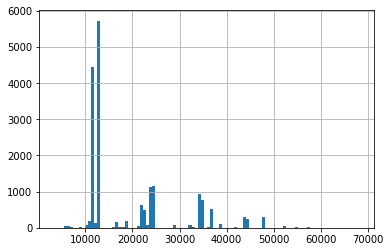

In [92]:
loan_prev[feats[1]].hist(bins=100)

<AxesSubplot:>

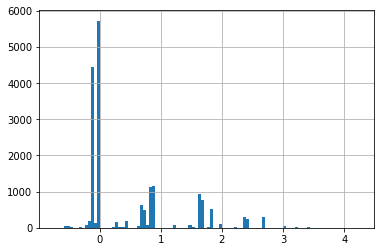

In [100]:
sc[feats[1]].hist(bins=100)

In [96]:
#Use Robust scaler
from sklearn.preprocessing import RobustScaler

robsc = RobustScaler()
rb_data = robsc.fit_transform(loan_prev[feats])

In [97]:

sc = pd.DataFrame(rb_data, columns=feats)
sc.describe()

,loannumber,totaldue,termdays
count,18183.000000,18183.000000,18183.000000
mean,0.297338,0.505631,-0.220481
std,0.812372,0.804173,0.729770
min,-0.500000,-0.734615,-1.000000
25%,-0.250000,-0.115385,-1.000000
50%,0.000000,0.000000,0.000000
75%,0.750000,0.884615,0.000000
max,5.750000,4.238462,4.000000


In [98]:
#Use MinMaxScaler scaler

from sklearn.preprocessing import MinMaxScaler

minsc = MinMaxScaler(feature_range=(0,2))
minmax_data = minsc.fit_transform(loan_prev[feats])
mm = pd.DataFrame(minmax_data, columns=feats)
mm.describe()


,loannumber,totaldue,termdays
count,18183.000000,18183.000000,18183.000000
mean,0.255148,0.498784,0.311808
std,0.259959,0.323411,0.291908
min,0.000000,0.000000,0.000000
25%,0.080000,0.249033,0.000000
50%,0.160000,0.295437,0.400000
75%,0.400000,0.651199,0.400000
max,2.000000,2.000000,2.000000


<AxesSubplot:>

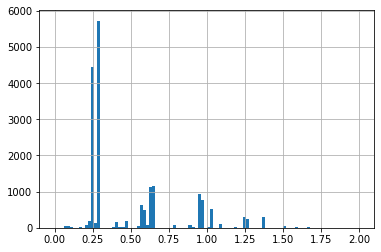

In [99]:
mm[feats[1]].hist(bins=100)


---------------------------------------------------------------------------------------------

### Working with Date/Time features
Date/Time features are very popular types of features present in numerous datasets. These features are temporal in nature and require specific feature extraction techniques. We briefly demonstrates some of these techniques below. There are numerous things we can do with temporal features, some of which are:

1. Extract date components like day of week, day of year, hour, minute, seconds, quarter, day of month etc.
2. Extract time-based features like evenings, noons, night time etc.
3. Extract seasonal features like rainy season, dry Season, harmattan period, winter, summer, autumn.
4. Place specific features like national holidays, religious breaks, festive periods etc.
5. Calculate time elapsed between two related Date features. 

__Time Elapsed:__ We demonstrate below how to calculate time elapsed between two Date features using the features approveddate and creationdate in the loan performance dataset.

In [105]:
#First convert to pandas datetime format
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'])
loan_perf['creationdate'] = pd.to_datetime(loan_perf['creationdate'])


loan_perf['date_elapsed_in_secs'] = (loan_perf['approveddate'] - loan_perf['creationdate']) / np.timedelta64(1,'s') #can subtitute with [h,m,s]
loan_perf['date_elapsed_in_secs'].describe()

count      4368.000000
mean       3697.149267
std        2497.606285
min        3604.000000
25%        3606.000000
50%        3607.000000
75%        3610.000000
max      154352.000000
Name: date_elapsed_in_secs, dtype: float64

In [107]:
154352.000000/(3600)

42.87555555555556

__Extract Date Features:__ We demonstrate below how to extract features like day, week, hour, seconds etc from Date time features below.

In [108]:
#First convert to pandas datetime format
loan_perf['approveddate'] = pd.to_datetime(loan_perf['approveddate'])

#use pandas built in functions
loan_perf['approved_day'] = loan_perf['approveddate'].dt.day
loan_perf['approved_week'] = loan_perf['approveddate'].dt.week
loan_perf['approved_hour'] = loan_perf['approveddate'].dt.hour
loan_perf.describe().T


,count,mean,std,min,25%,50%,75%,max
systemloanid,4368.0,3.019810e+08,13431.151516,3.019585e+08,3.019691e+08,3.019801e+08,3.019935e+08,3.020040e+08
loannumber,4368.0,2.179863e-01,0.047872,1.458698e-03,1.666667e-01,2.491027e-01,2.505643e-01,3.195792e-01
loanamount,4368.0,1.780907e+04,10749.694571,1.000000e+04,1.000000e+04,1.000000e+04,2.000000e+04,6.000000e+04
totaldue,4368.0,2.125738e+04,11943.510416,1.000000e+04,1.300000e+04,1.300000e+04,2.450000e+04,6.810000e+04
termdays,4368.0,2.926168e+01,11.512519,1.500000e+01,3.000000e+01,3.000000e+01,3.000000e+01,9.000000e+01
good_bad_flag,4368.0,2.179487e-01,0.412900,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
loannumber_or,4368.0,2.181182e-01,0.047606,1.458698e-03,1.666667e-01,2.491027e-01,2.505643e-01,3.195792e-01
date_elapsed_in_secs,4368.0,3.697149e+03,2497.606285,3.604000e+03,3.606000e+03,3.607000e+03,3.610000e+03,1.543520e+05
approved_day,4368.0,1.575504e+01,8.652409,1.000000e+00,8.000000e+00,1.600000e+01,2.400000e+01,3.000000e+01
approved_week,4368.0,2.843452e+01,1.231343,2.600000e+01,2.700000e+01,2.800000e+01,3.000000e+01,3.000000e+01


Find other time feature you can extract from a Pandas DateTime feature [here](https://medium.com/r/?url=https%3A%2F%2Fpandas.pydata.org%2Fpandas-docs%2Fstable%2Freference%2Fseries.html%23datetime-properties). 

__Get period of the day:__ We can get period of the day like mornings, afternoon, evenings from a Date Time feature by manually mapping it the hour to the periods. We demonstrate this below.

In [114]:
#Get night afternoon and evening

def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
    
loan_perf['period_of_day'] = loan_perf['approved_hour'].map(map_hours)
loan_perf['period_of_day'].value_counts()

morning      2022
evening      1218
afternoon    1128
Name: period_of_day, dtype: int64

Note: Numerous time functions including the ones used here have already been implemented in the [timeseries module of the datasist library](https://medium.com/r/?url=https%3A%2F%2Frisenw.github.io%2Fdatasist%2Ftimeseries.html). You can easily call and use them in just one line of code. Learn more about the datasist library [here](https://medium.com/r/?url=https%3A%2F%2Ftowardsdatascience.com%2Fhttps-medium-com-risingdeveloper-easy-data-analysis-visualization-and-modeling-using-datasist-part1-8b26526dbe01).

### Working with Latitudes and Longitudes
Geo-based features are a class of features present in some datasets. These features contain records about the geography location of a place/point. Features like Longitudes, Latitudes and Address are Geo-features that need to engineered. 

There are numerous things that we can do with latitude and longitude features. We can use libraries like Geojson, Geopy to convert these numerical values to physical address on a map. But this method is slow and does not really scale to large number of features. In this article, we will bypass this method and show simpler and quicker ways to extract features from longituds and latitudes. 

The techniques shown below is culled from this amazing  [kernel on kaggle](https://medium.com/r/?url=https%3A%2F%2Fwww.kaggle.com%2Fgaborfodor%2Ffrom-eda-to-the-top-lb-0-367) by Beluga.

1. __Manhattan distance:__ The manhattan distance is the sum of the horizontal and vertical distance between two points. Let's demonstrate this below using the sendy dataset.

In [115]:
#Manhattan distnace
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = np.abs(lat2 -lat1)
    b = np.abs(lng1 - lng2)
    return a + b

sendy_data['distance_manhattan'] = manhattan_distance(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)
sendy_data['distance_manhattan'].describe()

count    21201.000000
mean         0.075817
std          0.053592
min          0.000828
25%          0.035643
50%          0.064175
75%          0.101118
max          0.459280
Name: distance_manhattan, dtype: float64

In [120]:
(np.pi*2*6371)/360

111.19492664455873

First, we write a function to calculate the Manhattan distance. This is implemented in base Numpy. Next, we used the function created to calculate the Manhattan distance between Pickup and Destination.

2. __Haversine Distance:__ The Haversine distance is the great-circle distance between two points on a sphere given their longitudes and latitudes. It is very important in navigation.

In [116]:
#Haversine distance
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

sendy_data['distance_haversine'] = haversine_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

sendy_data['distance_haversine'].describe()

count    21201.000000
mean         6.507797
std          4.447623
min          0.088657
25%          3.132140
50%          5.475021
75%          8.805165
max         36.681749
Name: distance_haversine, dtype: float64

First, we write a function to calculate the Harversine distance. This is also implemented in base Numpy. Next, we use the function to calculate the harversine distance between Pickup and Destination.

3. __Bearing:__ The bearing is the compass direction to travel from a starting point, and must be within the range 0 to 360.

In [121]:
#Bearing
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))

sendy_data['bearing'] = bearing_array(sendy_data['Pickup Lat'].values, sendy_data['Pickup Long'].values,
                                                   sendy_data['Destination Lat'].values, sendy_data['Destination Long'].values)

sendy_data['bearing'].describe()

count    21201.000000
mean         8.170325
std        102.720924
min       -179.990849
25%        -81.740673
50%          3.202252
75%        107.278950
max        179.983808
Name: bearing, dtype: float64

Here, we first write the bearing function, then we use the function to calculate the bearing between Pickup and Destination.

4. __Get center point:__ We can calculate the mid-point between two points from their latitudes and longitudes. This can be done by adding both points and dividing by 2.

In [122]:
#Get center of lat and longitude
sendy_data['center_latitude'] = (sendy_data['Pickup Lat'].values + sendy_data['Destination Lat'].values) / 2
sendy_data['center_longitude'] = (sendy_data['Pickup Long'].values + sendy_data['Destination Long'].values) / 2
sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,distance_manhattan,distance_haversine,bearing,center_latitude,center_longitude
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.300406,36.829741,Rider_Id_432,745,0.005369,0.017978,1.930333,-2.076903,-1.309080,36.830056
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.295004,36.814358,Rider_Id_856,1993,0.008028,0.141406,11.339849,-56.392163,-1.323229,36.856837
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.300921,36.828195,Rider_Id_155,455,0.006593,0.022588,1.880079,-64.183866,-1.304603,36.835807
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.257147,36.795063,Rider_Id_855,1341,0.006711,0.061487,4.943458,-57.091553,-1.269224,36.813730
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.295041,36.809817,Rider_Id_770,1214,0.007414,0.046142,3.724829,148.114398,-1.280819,36.800968


Here, we calculate the center latitude by first adding the Pickup Latitude with Destination Latitude and then divide the result by 2. We do the same for the Pickup Longitude and Destination Longitude. 

__Note: Geo functions like Manhattan, Harversine and Bearing distances are already implemented in the [datasist library](https://medium.com/r/?url=https%3A%2F%2Frisenw.github.io%2Fdatasist%2Ffeature_engineering.html). You can easily call and use them in just one line of code. Learn more about the datasist library [here](https://medium.com/r/?url=https%3A%2F%2Ftowardsdatascience.com%2Fhttps-medium-com-risingdeveloper-easy-data-analysis-visualization-and-modeling-using-datasist-part1-8b26526dbe01).__

### And we draw the curtain here…

Feature engineering is important and is the difference between a good machine learning model and the best machine learning model.

In this notebook, we have learnt about some of the techniques and tools for performing feature engineering. We started by defining feature engineering, then looked at some ways to handle missing values Next, we showed some encoding techniques for handling categorical features and various ways for handling numerical features where we specifically talked about log transformations, polynomial/cross features and use of domain expertise in creating new features. Next, we talked about some normalization strategy available in sklearn, how to work with DateTime features and finally, how to handle Geo features like latitudes and longitudes. 

This has been a really long post, but I'm sure you have learnt alot and will use most of the techniques here in your next project.

#### Connect with me on [twitter](https://medium.com/r/?url=https%3A%2F%2Ftwitter.com%2Frisin_developer).

#### Connect with me on [linkedin](https://medium.com/r/?url=https%3A%2F%2Fwww.linkedin.com%2Fin%2Frisingdeveloper%2F).